In [168]:
#We imported our necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler






from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



import warnings
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv("Train-customer.csv")

In [170]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [171]:
df.shape

(8068, 11)

In [172]:
df.drop('ID',axis=1,inplace=True)

In [173]:
missing_data = df.isnull().sum()
print(missing_data)
#We checked your missing data

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [174]:
df_drop=df.dropna()
#We dropped our missing data

In [175]:
print(df_drop.dtypes)
#We check the data types

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


In [176]:
unique_values_age = df_drop['Age'].unique()
print(unique_values_age)
#We decided to treat the age variable categorically in the visualization dataset.

[22 67 56 32 33 61 55 26 19 58 41 31 79 49 18 36 35 45 42 83 27 28 47 40
 57 76 25 48 74 59 51 30 63 52 39 38 60 68 86 43 80 37 46 72 69 50 29 71
 78 82 70 23 20 21 53 75 65 89 62 66 73 77 87 84 88 85 81]


In [177]:
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64','65-74','75-84','85+']
bins_age=[18, 25, 35, 45, 55, 65,75 , 85, 95]
df_drop['age_categories'] = pd.cut(df_drop['Age'], bins=bins_age, labels=age_labels, right=False)
#Since we will consider the age group categorically, we divide it into groups.

In [178]:
#Now let's delete our age value
data = df_drop.drop('Age', axis=1)

In [179]:
data.head()

,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,age_categories
0,Male,No,No,Healthcare,1.0,Low,4.0,Cat_4,D,18-24
2,Female,Yes,Yes,Engineer,1.0,Low,1.0,Cat_6,B,65-74
3,Male,Yes,Yes,Lawyer,0.0,High,2.0,Cat_6,B,65-74
5,Male,Yes,No,Artist,0.0,Average,2.0,Cat_6,C,55-64
6,Male,No,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,25-34


In [180]:
print(data.dtypes)

Gender               object
Ever_Married         object
Graduated            object
Profession           object
Work_Experience     float64
Spending_Score       object
Family_Size         float64
Var_1                object
Segmentation         object
age_categories     category
dtype: object


In [181]:
data['Work_Experience'] = data['Work_Experience'].astype('str')
data['Family_Size'] = data['Family_Size'].astype('str')
#We convert our other variables to string.

In [182]:
print(data.dtypes)

Gender               object
Ever_Married         object
Graduated            object
Profession           object
Work_Experience      object
Spending_Score       object
Family_Size          object
Var_1                object
Segmentation         object
age_categories     category
dtype: object


In [183]:
#We transfer our values ​​to the data we prepared before in our dictionary structure.
gender_mapping = {
   'Male' : 1,
   'Female' : 2
}
ever_married_mapping = {
   'No' : 1,
   'Yes' : 2
}
graduating_mapping = {
   'No' : 1,
   'Yes' : 2
}
profession_mapping = {
   'Healthcare' : 1,
   'Engineer' : 2,
   'Lawyer' : 3,
   'Artist' : 4,
   'Doctor' : 5,
   'Homemaker' : 6,
   'Entertainment' : 7,
   'Marketing' : 8,
   'Executive' : 9
}
work_Experience_mapping = {
   '1.0' : 2,
   '0.0' : 1,
   '4.0' : 3,
   '9.0' : 4,
   '12.0' : 5,
   '3.0' : 6,
   '13.0' : 7,
   '5.0' : 8,
   '8.0' : 9,
   '14.0' : 10,
   '7.0' : 11,
   '2.0' : 12,
   '6.0' : 13,
   '10.0' : 14,
   '11.0' : 15
}
spending_Score_mapping = {
   'Low' : 1,
   'High' : 2,
   'Average' : 3
}
family_Size_mapping = {
   '4.0' : 4,
   '1.0' : 1,
   '2.0' : 2,
   '3.0' : 3,
   '5.0' : 5,
   '6.0' : 6,
   '8.0' : 8,
   '7.0' : 7,
   '9.0' : 9
}
var_1_mapping = {
   'Cat_4' : 1,
   'Cat_6' : 2,
   'Cat_7' : 3,
   'Cat_3' : 4,
   'Cat_1' : 5,
   'Cat_2' : 6,
   'Cat_5' : 7
}
Segmentation_mapping = {
   'D' : 1,
   'B' : 2,
   'C' : 3,
   'A' : 4
}
age_mapping = {
   '18-24':1,
   '25-34':2,
   '35-44':3,
   '45-54':4, 
   '55-64':5,
   '65-74':6,
   '75-84':7,
   '85+':8
}


In [184]:
data['Gender'] = data['Gender'].map(gender_mapping)
data['Ever_Married'] = data['Ever_Married'].map(ever_married_mapping)
data['Graduated'] = data['Graduated'].map(graduating_mapping)
data['Profession'] = data['Profession'].map(profession_mapping)
data['Work_Experience'] = data['Work_Experience'].map(work_Experience_mapping)
data['Spending_Score'] = data['Spending_Score'].map(spending_Score_mapping)
data['Family_Size'] = data['Family_Size'].map(family_Size_mapping)
data['Segmentation'] = data['Segmentation'].map(Segmentation_mapping)
data['age_categories'] = data['age_categories'].map(age_mapping)
data['Var_1'] = data['Var_1'].map(var_1_mapping)
#We combine our text values ​​with our dictionary.

In [185]:
data.head()


,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,age_categories
0,1,1,1,1,2,1,4,1,1,1
2,2,2,2,2,2,1,1,2,2,6
3,1,2,2,3,1,2,2,2,2,6
5,1,2,1,4,1,3,2,2,3,5
6,1,1,2,1,2,1,3,2,3,2


In [186]:

X_knn= data.drop('Segmentation', axis=1)  # Features (excluding the target)
y_knn = data['Segmentation']  # Target variable

# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [187]:

scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

X_train_knn.shape,y_train_knn.shape,X_test_knn.shape,y_test_knn.shape


((5332, 9), (5332,), (1333, 9), (1333,))

In [188]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=4)

In [189]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_knn, y_train_knn)

#Prediksi hasil test set
y_pred_knn = model_knn.predict(X_test_knn)
y_pred_train_knn = model_knn.predict(X_train_knn)


print("knn train set:: {0:0.4f}".format(accuracy_score(y_train_knn, y_pred_train_knn)))
print("knn test set:: {0:0.4f}".format(accuracy_score(y_test_knn, y_pred_knn)))


knn train set:: 0.6393
knn test set:: 0.4531


n_neighbors = 1, Train Accuracy: 0.8449, Test Accuracy: 0.4524
n_neighbors = 2, Train Accuracy: 0.6785, Test Accuracy: 0.4216
n_neighbors = 3, Train Accuracy: 0.6647, Test Accuracy: 0.4674
n_neighbors = 4, Train Accuracy: 0.6393, Test Accuracy: 0.4531
n_neighbors = 5, Train Accuracy: 0.6238, Test Accuracy: 0.4614
n_neighbors = 6, Train Accuracy: 0.6131, Test Accuracy: 0.4711
n_neighbors = 7, Train Accuracy: 0.6020, Test Accuracy: 0.4839
n_neighbors = 8, Train Accuracy: 0.5919, Test Accuracy: 0.4839
n_neighbors = 9, Train Accuracy: 0.5870, Test Accuracy: 0.4824
n_neighbors = 10, Train Accuracy: 0.5769, Test Accuracy: 0.4876


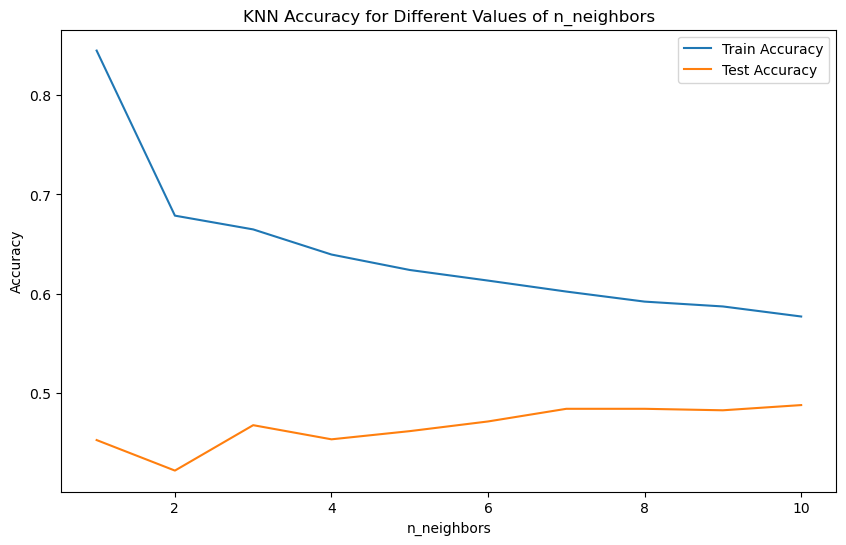

In [190]:
# Let's define the value range for n_neighbourhood
n_neighbors_values = list(range(1, 11))

# Let's create a list of these accuracy score
train_accuracy_scores = []
test_accuracy_scores = []

# Let's create a loop
for n_neighbors in n_neighbors_values:
    # Let's create and train the KNN model
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_knn.fit(X_train_knn, y_train_knn)

    # Predictions on training and test sets
    y_pred_train_knn = model_knn.predict(X_train_knn)
    y_pred_knn = model_knn.predict(X_test_knn)

    # CLet's calculate it and add it to our list.
    train_accuracy = accuracy_score(y_train_knn, y_pred_train_knn)
    test_accuracy = accuracy_score(y_test_knn, y_pred_knn)

    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

    # Let's print the accuracy rates
    print(f"n_neighbors = {n_neighbors}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_neighbors_values, y=train_accuracy_scores, label='Train Accuracy')
sns.lineplot(x=n_neighbors_values, y=test_accuracy_scores, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of n_neighbors')
plt.legend()
plt.show()

In [191]:
X_rf = data.drop('Segmentation', axis=1)  
y_rf =data['Segmentation'] 


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


In [192]:


#Let's increase model performance

scaler = MinMaxScaler()
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

X_train_rf.shape,y_train_rf.shape,X_test_rf.shape,y_test_rf.shape

((5332, 9), (5332,), (1333, 9), (1333,))

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [194]:
rf = RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)
y_pred_train_rf = rf.predict(X_train_rf)
y_pred_rf = rf.predict(X_test_rf)

print("Random Forest train set:: {0:0.4f}".format(accuracy_score(y_train_rf, y_pred_train_rf)))
print("Random Forest test set:: {0:0.4f}".format(accuracy_score(y_test_rf, y_pred_rf)))

Random Forest train set:: 0.8665
Random Forest test set:: 0.4929


In [195]:
#Let's try the same operations for our variable value.

In [196]:
#Let's start with knn

In [197]:
X_knn_var= data.drop('Var_1', axis=1)  # Features (excluding the target)
y_knn_var = data['Var_1']  # Target variable

# Split the data into training and testing sets
X_train_knn_var, X_test_knn_var, y_train_knn_var, y_test_knn_var = train_test_split(X_knn_var, y_knn_var, test_size=0.2, random_state=42)

In [198]:
scaler = MinMaxScaler()
X_train_knn_var = scaler.fit_transform(X_train_knn_var)
X_test_knn_var = scaler.transform(X_test_knn_var)

X_train_knn_var.shape,y_train_knn_var.shape,X_test_knn_var.shape,y_test_knn_var.shape

((5332, 9), (5332,), (1333, 9), (1333,))

In [199]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_knn_var, y_train_knn_var)

KNeighborsClassifier(n_neighbors=4)

In [200]:
model_knn_var = KNeighborsClassifier(n_neighbors=4)
model_knn_var.fit(X_train_knn_var, y_train_knn_var)

#Prediksi hasil test set
y_pred_knn_var = model_knn.predict(X_test_knn_var)
y_pred_train_knn_var = model_knn.predict(X_train_knn_var)


print("knn train set:: {0:0.4f}".format(accuracy_score(y_train_knn_var, y_pred_train_knn_var)))
print("knn test set:: {0:0.4f}".format(accuracy_score(y_test_knn_var, y_pred_knn_var)))


knn train set:: 0.7125
knn test set:: 0.6189


In [201]:
#Let's continue with our random forest model

In [202]:
X_rf_var = data.drop('Var_1', axis=1)  
y_rf_var =data['Var_1'] 


X_train_rf_var, X_test_rf_var, y_train_rf_var, y_test_rf_var = train_test_split(X_rf_var, y_rf_var, test_size=0.2, random_state=42)

In [203]:

scaler = MinMaxScaler()
X_train_rf_var = scaler.fit_transform(X_train_rf_var)
X_test_rf_var = scaler.transform(X_test_rf_var)

X_train_rf_var.shape,y_train_rf_var.shape,X_test_rf_var.shape,y_test_rf_var.shape

((5332, 9), (5332,), (1333, 9), (1333,))

In [204]:
rf = RandomForestClassifier()
rf.fit(X_train_rf_var, y_train_rf_var)
y_pred_train_rf_var = rf.predict(X_train_rf_var)
y_pred_rf_var = rf.predict(X_test_rf_var)

print("Random Forest train set:: {0:0.4f}".format(accuracy_score(y_train_rf_var, y_pred_train_rf_var)))
print("Random Forest test set:: {0:0.4f}".format(accuracy_score(y_test_rf_var, y_pred_rf_var)))

Random Forest train set:: 0.8938
Random Forest test set:: 0.6309
